<a href="https://colab.research.google.com/github/SeithatiNtu/Machine-learning-Classification-/blob/master/hackaton_zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

The objective of this competition is to create a machine learning model to detect fraudulent transactions.

Fraud detection is an important application of machine learning in the financial services sector. This solution will help Xente provide improved and safer service to its customers.

This competition is sponsored by Xente, Innovation Village, and insight2impact.

http://www.innovationvillage.co.ug/

**Importing Packages & Data**

In [699]:
# Running cell to mount in my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**loading data sets and checking for their shape**

In [0]:
train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')

In [702]:
# Checking size of both data files
print(train.shape)
print(test.shape)

(95662, 16)
(45019, 23)


checking whether our train set and test set look alike

In [703]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [704]:
df_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


As we see our data set look alike and as expected fraudResults does not exist in test set which is our target variable

**checking missing values**

In [705]:
#checking for missing value in train 
train.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [706]:
#missing value in test
df_test.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

**Combining train and test Datasets**

In [707]:
#combine train and test 
fraud = pd.concat([train, df_test],sort=False).reset_index(drop=True)
fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0.0


In [708]:
fraud.size

2250896

In [709]:
fraud.shape

(140681, 16)

**Doing some visualization**

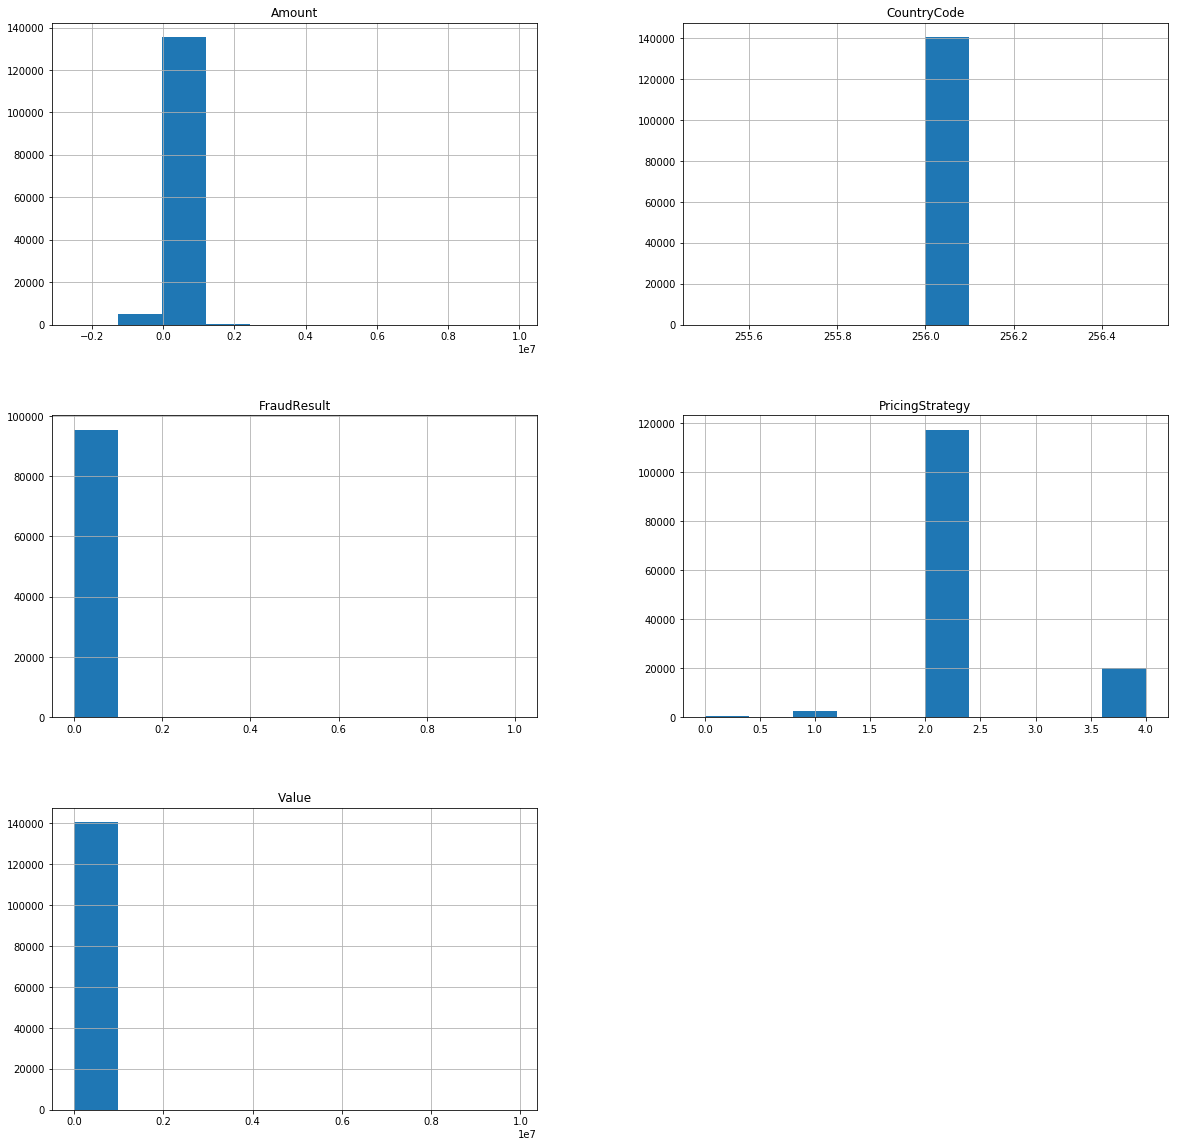

In [710]:
fraud.hist(figsize = (20, 20))
plt.show()

we have TransactionStartTime on the data set we can create column for every Year from TransactionStartTime and drop TransactionStartTime, which will record transaction for each year

**Data Cleaning**

In [711]:
# creating a year column from TransactionStartTime column
fraud['Year'] = pd.DatetimeIndex(fraud['TransactionStartTime']).year
# Drop the TransactionStartTime
fraud.drop(['TransactionStartTime'], axis = 1, inplace = True)
fraud.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0.0,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0.0,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0.0,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0.0,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0.0,2018


In [712]:
#check the currency code and Country code
fraud['CurrencyCode'].describe()

count     140681
unique         1
top          UGX
freq      140681
Name: CurrencyCode, dtype: object

In [713]:
fraud['CountryCode'].describe()

count    140681.0
mean        256.0
std           0.0
min         256.0
25%         256.0
50%         256.0
75%         256.0
max         256.0
Name: CountryCode, dtype: float64

In [714]:
len(fraud['CountryCode'])

140681

look like we have country code through out

In [715]:
#dropping all columns that will not be useful
fraud.drop(['SubscriptionId','ProductId','ChannelId','CustomerId', 'CurrencyCode', 'CountryCode'], axis = 1, inplace = True)
fraud.head()

,TransactionId,BatchId,AccountId,ProviderId,ProductCategory,Amount,Value,PricingStrategy,FraudResult,Year
0,TransactionId_76871,BatchId_36123,AccountId_3957,ProviderId_6,airtime,1000.0,1000,2,0.0,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,ProviderId_4,financial_services,-20.0,20,2,0.0,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,ProviderId_6,airtime,500.0,500,2,0.0,2018
3,TransactionId_380,BatchId_102363,AccountId_648,ProviderId_1,utility_bill,20000.0,21800,2,0.0,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,ProviderId_4,financial_services,-644.0,644,2,0.0,2018


**lets check all other columns**

In [716]:
fraud['ProductCategory'].describe()

count                 140681
unique                    10
top       financial_services
freq                   67105
Name: ProductCategory, dtype: object

In [717]:
fraud['PricingStrategy'].describe()

count    140681.000000
mean          2.257469
std           0.735089
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: PricingStrategy, dtype: float64

In [718]:
fraud['PricingStrategy'].unique

<bound method Series.unique of 0         2
1         2
2         2
3         2
4         2
5         2
6         4
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        4
20        2
21        4
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
140651    2
140652    1
140653    2
140654    4
140655    1
140656    2
140657    1
140658    2
140659    1
140660    1
140661    1
140662    2
140663    1
140664    2
140665    2
140666    2
140667    2
140668    1
140669    2
140670    2
140671    1
140672    2
140673    1
140674    2
140675    1
140676    2
140677    1
140678    1
140679    2
140680    4
Name: PricingStrategy, Length: 140681, dtype: int64>

In [719]:
fraud['BatchId'].describe()

count            140681
unique           139493
top       BatchId_67019
freq                 28
Name: BatchId, dtype: object

In [720]:
fraud['ProviderId'].describe()

count           140681
unique               6
top       ProviderId_4
freq             56445
Name: ProviderId, dtype: object

In [721]:
# Encode columns with dummy variables
categorical = ['PricingStrategy', 'ProductCategory', 'ProviderId']

for var in categorical:
    fraud = pd.concat([fraud, 
                    pd.get_dummies(fraud[var], prefix=var)], axis=1)
    del fraud[var]
fraud.head()

,TransactionId,BatchId,AccountId,Amount,Value,FraudResult,Year,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,TransactionId_76871,BatchId_36123,AccountId_3957,1000.0,1000,0.0,2018,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,-20.0,20,0.0,2018,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,500.0,500,0.0,2018,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,TransactionId_380,BatchId_102363,AccountId_648,20000.0,21800,0.0,2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,-644.0,644,0.0,2018,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#drop TransactionId
fraud.drop(['TransactionId'], axis = 1, inplace = True)

In [0]:
#drop AccountId and batchId
fraud.drop(['AccountId', 'BatchId'], axis = 1, inplace = True)

In [724]:
fraud.head()

,Amount,Value,FraudResult,Year,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6
0,1000.0,1000,0.0,2018,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-20.0,20,0.0,2018,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,500.0,500,0.0,2018,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20000.0,21800,0.0,2018,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,-644.0,644,0.0,2018,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


**Creating train and test**

In [0]:
train = fraud[pd.notnull(fraud['FraudResult'])]

In [726]:
train.shape

(95662, 24)

In [0]:
test = fraud[pd.isnull(fraud['FraudResult'])].drop(['FraudResult'], axis=1)

In [728]:
test.shape

(45019, 23)

In [0]:
#creating x and y variables
X = train.drop(['FraudResult'], axis = 1)
y = train['FraudResult']

In [788]:
y.shape

(95662,)

In [787]:
X.shape

(95662, 23)

**Modelling**

In [0]:
# Spliting the data to train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [734]:
for i in [X_train, X_test, test]:
    print(i.shape)

(76529, 23)
(19133, 23)
(45019, 23)


**train the model**

In [0]:
# Train The Model using Logistic Regression model
model = LogisticRegression()

In [736]:
#fitting the model
logistic = model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
y_pred = logistic.predict(test)

In [793]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [744]:
from sklearn.metrics import accuracy_score
logistic.score(X,y).mean()

0.9982438167715498

submission file for Logistic regression

In [0]:
#sub = pd.DataFrame()
submission = df_test[['TransactionId']]

In [746]:
submission['FraudResult'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [747]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
sub.to_csv('submission.csv', index = False)

**cross validation**

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(RandomForestRegressor())

In [0]:
model = my_pipeline

fit the model

In [751]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [752]:
print(test.shape)


(45019, 23)


In [0]:
y_pred = model.predict(test)

In [754]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [755]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
print(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.000819   -0.00046914 -0.0011409 ]


In [756]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 0.000810


In [0]:
#sub = pd.DataFrame()
submission = df_test[['TransactionId']]

In [758]:
submission['FraudResult'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
CV = submission

In [760]:
CV.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
sub.to_csv('CV.csv', index = False)

**Random forest**

In [0]:
# Train The Model using Random Forest
random_f = RandomForestClassifier(random_state=42)

In [763]:
random_f.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Predict the y values
y_pred = random_f.predict(test)

In [765]:
cross_val_score(random_f, X_train, y_train, cv=5).mean()

0.9993858557750214

submission for random forest

In [0]:
Random_FSub = df_test[['TransactionId']]

In [767]:
Random_FSub['FraaudResult'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
Random_FSub.to_csv('Forest.csv', index = False)

In [769]:
Random_FSub.head()

,TransactionId,FraaudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV
model = OneVsRestClassifier(LogisticRegressionCV())

In [778]:
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


OneVsRestClassifier(estimator=LogisticRegressionCV(Cs=10, class_weight=None,
                                                   cv='warn', dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1.0,
                                                   l1_ratios=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   refit=True, scoring=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0),
                    n_jobs=None)

In [0]:
y_pred = model.predict(test)

In [0]:
 OnevsRest= df_test[['TransactionId']]

In [781]:
OnevsRest['FraaudResult'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
OnevsRest.to_csv('OnevsRest.csv', index = False)

In [785]:
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

ValueError: ignored

**Conclusion**

from the analysis that CV and logistic regression performs better than other models

I Phomolo, Ntumelang, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).